# Ichimoku Kinko Hyo (AKA Ichimoku Cloud)

https://www.investopedia.com/terms/i/ichimokuchart.asp

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^nsei'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


Tenkan-sen - The tenkan-sen, or conversion line, is calculated by adding the highest high and the highest low over the past nine periods and then dividing the result by two. The resulting line represents a key support and resistance level, as well as a signal line for reversals.

In [3]:
# First Create Tenkan_Sen
high_9 = df['High'].rolling(9).max()
low_9 = df['Low'].rolling(9).min()
df['Tenkan_Sen'] = (high_9 + low_9) /2

Kijun-sen - The kijun-sen, or base line, is calculated by adding the highest high and the lowest low over the past 26 periods and dividing the result by two. The resulting line represents a key support and resistance level, a confirmation of a trend change, and can be used as a trailing stop-loss point.

In [4]:
# Second Create Kijun Sen
high_26 = df['High'].rolling(26).max()
low_26 = df['Low'].rolling(26).min()
df['Kijun_Sen'] = (high_26 + low_26) /2


Senkou Span A - The senkou span A, or leading span A, is calculated by adding the tenkan-sen and the kijun-sen, dividing the result by two, and then plotting the result 26 periods ahead. The resulting line forms one edge of the kumo - or cloud - that's used to identify future areas of support and resistance.


In [5]:
# Third Create Senkou Span A 
df['Senkou_Span_A'] = ((df['Tenkan_Sen'] + df['Kijun_Sen']) / 2).shift(26)

Senkou Span B - The senkou span B, or leading span B, is calculated by adding the highest high and the lowest low over the past 52 periods, dividing it by two, and then plotting the result 26 periods ahead. The resulting line forms the other edge of the kumo that's used to identify future areas of support and resistance.

In [6]:
# Fourth Create Senkou Span B 
high_52 = df['High'].rolling(52).max()
low_52 = df['Low'].rolling(52).min()
df['Senkou_Span_B'] = ((high_52 + low_52) /2).shift(26)

Chikou Span - The chikou span, or lagging span, is the current period's closing price plotted 26 days back on the chart. This line is used to show possible areas of support and resistance.

In [7]:
df['Chikou_Span'] = df['Adj Close'].shift(-26)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


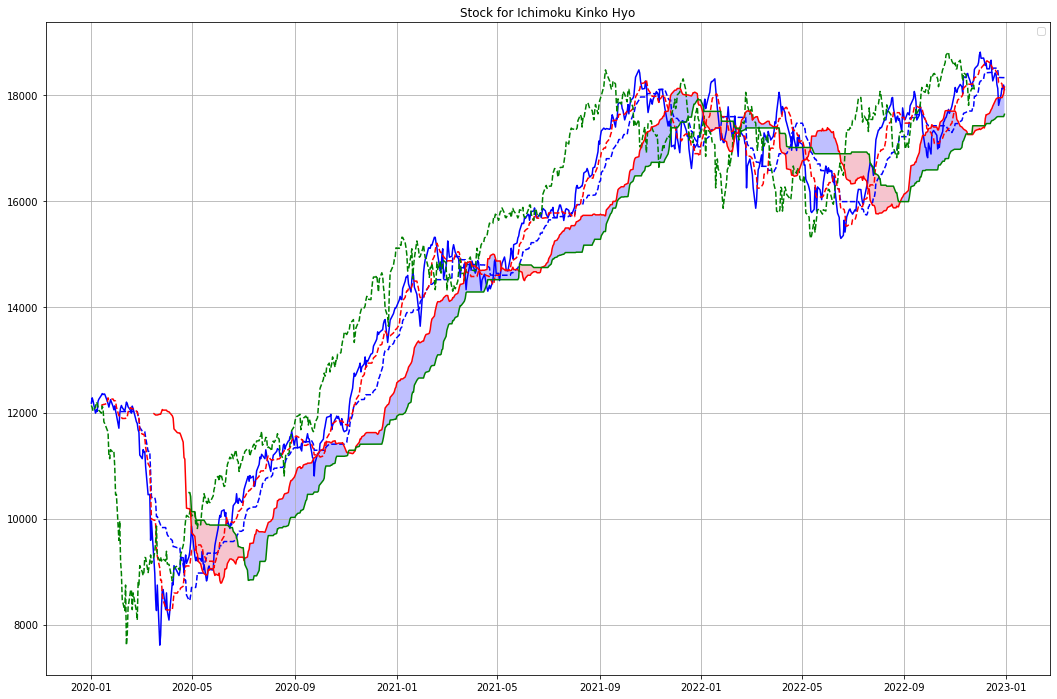

In [8]:
plt.figure(figsize=(18,12))
plt.plot(df['Adj Close'], '-b')
plt.plot(df['Kijun_Sen'],  'b--')
plt.plot(df['Tenkan_Sen'],  'r--')
plt.plot(df['Chikou_Span'], 'g--')
plt.plot(df['Senkou_Span_A'], 'r')
plt.plot(df['Senkou_Span_B'], 'g')
plt.fill_between(df.index, df['Senkou_Span_A'], df['Senkou_Span_B'], where=df['Senkou_Span_A']> df['Senkou_Span_B'], facecolor='blue', interpolate=True, alpha=0.25)
plt.fill_between(df.index, df['Senkou_Span_A'], df['Senkou_Span_B'], where=df['Senkou_Span_B']> df['Senkou_Span_A'], facecolor='crimson', interpolate=True, alpha=0.25)
plt.grid()
plt.legend(loc='best')
plt.title('Stock for Ichimoku Kinko Hyo')
plt.show()

In [9]:
df2 = df.reset_index()
df2 = df2.apply(pd.to_numeric, errors='ignore')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tenkan_Sen,Kijun_Sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
0,1577817000000000000,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,NaN,NaN,NaN,NaN,12137.950195
1,1577903400000000000,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,NaN,NaN,NaN,NaN,12098.349609
2,1577989800000000000,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,NaN,NaN,NaN,NaN,12031.500000
3,1578249000000000000,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,NaN,NaN,NaN,NaN,12107.900391
4,1578335400000000000,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,NaN,NaN,NaN,NaN,12201.200195


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


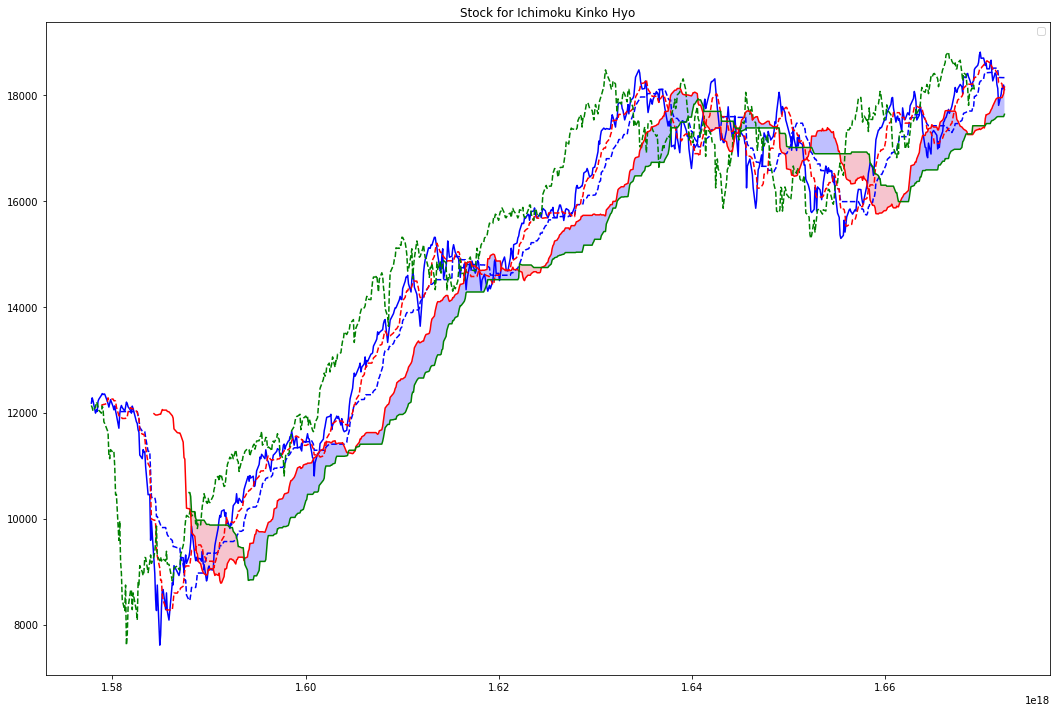

In [10]:
# This one does not show dates
plt.figure(figsize=(18,12))
plt.plot(df2['Date'], df2['Adj Close'], '-b')
plt.plot(df2['Date'], df2['Kijun_Sen'],  'b--')
plt.plot(df2['Date'], df2['Tenkan_Sen'],  'r--')
plt.plot(df2['Date'], df2['Chikou_Span'], 'g--')
plt.plot(df2['Date'], df2['Senkou_Span_A'], 'r')
plt.plot(df2['Date'], df2['Senkou_Span_B'], 'g')
plt.fill_between(df2['Date'], df2['Senkou_Span_A'], df2['Senkou_Span_B'], where=df2['Senkou_Span_A']> df2['Senkou_Span_B'], facecolor='blue', interpolate=True, alpha=0.25)
plt.fill_between(df2['Date'], df2['Senkou_Span_A'], df2['Senkou_Span_B'], where=df2['Senkou_Span_B']> df2['Senkou_Span_A'], facecolor='crimson', interpolate=True, alpha=0.25)
plt.legend(loc='best')
plt.title('Stock for Ichimoku Kinko Hyo')
plt.show()